In [8]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pathlib import Path
from pandas import read_csv, DataFrame

In [13]:
data = read_csv(Path("/Users/blabaschin/Documents/Technical/GitHub/Helix-MDP/docs/data/April2021OutAthenaRevelio.csv"))

In [14]:
data

,company,month,ai_sum,ai_in,ai_out,cloud_sum,cloud_in,cloud_out,datascience_sum,datascience_in,...,naics_code,naics_description,cik,lei,agg_sml,agg_obs,agg_reorg,agg_rcog,agg_rman,agg_tele
0,Heron Therapeutics Inc,2017-11,NaN,NaN,NaN,5.410117,0.000004,6.343190e-06,15.267342,1.407777e-05,...,NaN,NaN,NaN,NaN,2.853931,3.765711,4.452304,0.438269,-0.197353,0.326394
1,Heron Therapeutics Inc,2019-07,NaN,NaN,NaN,9.122784,0.001616,1.999217e-03,22.516964,4.570011e-03,...,NaN,NaN,NaN,NaN,2.843072,3.797250,4.475587,0.415692,-0.253425,0.360833
2,Hersha Hospitality Trust,2013-05,20.114271,0.000841,5.234667e-17,20.901424,0.000564,1.011018e-16,93.818050,5.160012e+00,...,NaN,NaN,NaN,NaN,3.167813,3.543795,4.661072,0.124741,0.200943,0.084058
3,Hershey Company,2016-05,10.557860,0.019948,2.484004e-03,224.555560,14.787168,3.051606e+00,360.706730,3.367144e+01,...,NaN,NaN,NaN,NaN,2.964091,3.685215,4.402210,0.192888,0.284075,0.282566
4,"Hertz Global Holdings, Inc.",2012-09,38.808353,0.189519,3.782879e+00,810.401500,22.724280,1.023404e+01,631.888400,2.204515e+01,...,NaN,NaN,NaN,NaN,2.975635,3.729125,4.386020,0.581415,0.010646,0.321238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893072,Silvercrest Asset Management Group Inc,2012-01,NaN,NaN,NaN,0.000000,0.000000,0.000000e+00,1.076726,1.489726e-10,...,NaN,NaN,NaN,NaN,3.006069,3.698073,4.615101,0.155795,-0.521812,0.555190
893073,Silvercrest Asset Management Group Inc,2019-04,NaN,NaN,NaN,0.000000,0.000000,0.000000e+00,4.156512,2.113968e-04,...,NaN,NaN,NaN,NaN,3.037238,3.573649,4.644320,0.073058,-0.312541,0.470319
893074,Silvercrest Asset Management Group Inc,2019-08,NaN,NaN,NaN,0.000000,0.000000,0.000000e+00,4.149766,1.959742e-04,...,NaN,NaN,NaN,NaN,3.006771,3.524236,4.582345,0.064299,-0.282533,0.457813
893075,Simcorp A/S,2008-11,37.160500,1.858353,5.006121e+00,406.889830,11.750668,8.522444e+00,87.015840,2.098377e+00,...,NaN,NaN,NaN,NaN,2.993080,3.964656,4.619536,0.234443,-0.421861,0.635651


In [16]:
swktix = ['GE','SWK','DHR','DOB','EMR','HON','IR','ITW','MMM','SPXC','TXT','RTX']
alixpartners = data[data.ticker.isin(swktix)]

In [17]:
alixpartners.to_csv("/Users/blabaschin/Documents/Technical/GitHub/Helix-MDP/docs/data/alixpartners_1_26_2022.csv")


In [23]:
alixpartners['dt'] = pd.to_datetime(alixpartners['month'], format='%Y-%m')

/var/folders/tg/75mg9sr9019bjgkv10x7t78h0000gn/T/ipykernel_52960/915526881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alixpartners['dt'] = pd.to_datetime(alixpartners['month'], format='%Y-%m')


Text(0.29999999999999716, 0.5, 'ML Exposure')

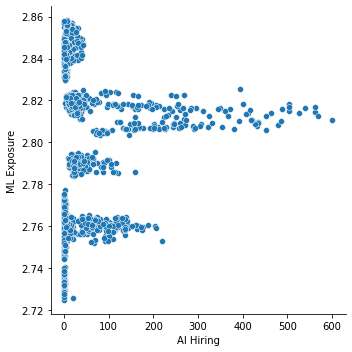

In [19]:
sns.relplot(x='ai_in',y='agg_sml',data=alixpartners)
plt.xlabel('AI Hiring')
plt.ylabel('ML Exposure')


In [24]:
norm_dict = {}
for ticker in swktix:
    match_df = alixpartners[alixpartners['ticker'] == ticker]['ai_in']
    max_ = match_df.max()
    min_ = match_df.min()
    norm_dict[ticker] = []
    for val in match_df:
        norm_dict[ticker].append((val - min_) / (max_ - min_))

In [35]:
normed_ai_in = pd.DataFrame.from_dict(norm_dict, orient='index').transpose().dropna(axis=1)

In [40]:
normed_ai_in['dt'] = alixpartners['dt'].values

ValueError: Length of values (1422) does not match length of index (158)

In [44]:
# normed_ai_in
alixpartners['normed_ai_in'] =  alixpartners.groupby('ticker')['ai_in'].transform(lambda x: (x - x.mean()) / x.std())

/var/folders/tg/75mg9sr9019bjgkv10x7t78h0000gn/T/ipykernel_52960/3093209070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alixpartners['normed_ai_in'] =  alixpartners.groupby('ticker')['ai_in'].transform(lambda x: (x - x.mean()) / x.std())


Text(0.5, 0, 'Date')

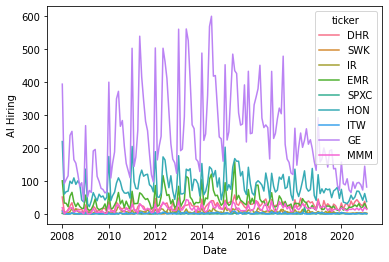

In [45]:
 # plot plasma lineplot
sns.set_palette('plasma_r')
sns.lineplot(x='dt', y='ai_in', hue='ticker', data=alixpartners)
plt.ylabel('AI Hiring')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

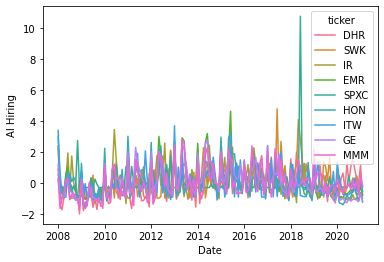

In [46]:
 # plot plasma lineplot
sns.set_palette('plasma_r')
sns.lineplot(x='dt', y='normed_ai_in', hue='ticker', data=alixpartners)
plt.ylabel('AI Hiring')
plt.xlabel('Date')